<a href="https://colab.research.google.com/github/aadi-29/machinelearning/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('iris.csv')
data

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [2]:
#Dropped last column
d = data.drop(['class'], axis = 1)
d

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
d.dtypes

sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
dtype: object

In [4]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()


scalar.fit(d)
scaled_data = scalar.transform(d)

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape

(150, 2)

In [5]:

from sklearn.cluster import KMeans
from sklearn import metrics

sf = []
k = []
inertia = []

for i in range(2,11):
  scorearr=[]
  inertiarr=[]
  k.append(i)
  for j in range (0,10):
      kmeans = KMeans(n_clusters= i).fit(x_pca)   
      score = metrics.silhouette_score(x_pca, kmeans.labels_, metric='euclidean')
      scorearr.append(score)
      inertiarr.append(kmeans.inertia_)

  score=sum(scorearr)/len(scorearr)
  sf.append(score)
  iner=sum(inertiarr)/len(inertiarr)
  inertia.append(iner)
      
print(sf)
print(k)
print(inertia)

[0.6130367695437592, 0.5088421682104817, 0.4454512074891667, 0.41724586705613154, 0.42774761108948944, 0.4333423099770496, 0.4416059605104987, 0.44175526194779147, 0.4385294070252507]
[2, 3, 4, 5, 6, 7, 8, 9, 10]
[198.70683592637357, 116.14920992775811, 89.67250858610751, 66.37176275661884, 57.10970725576651, 48.080269934063836, 39.500634591456205, 32.474347392246905, 28.737323986377213]


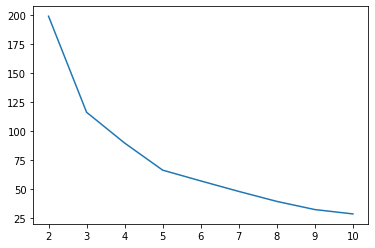

In [6]:
import matplotlib.pyplot as plt
#K vs Inertia
plt.plot(k,inertia)

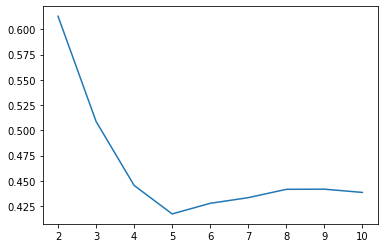

In [7]:
#K vs S factor
plt.plot(k,sf)

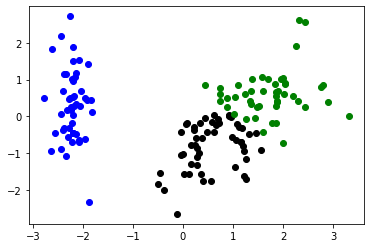

In [15]:
#K-value at peak is 5
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(x_pca)


#filter rows of original data
filtered_label0 = x_pca[label == 0]
filtered_label1 = x_pca[label == 1]
filtered_label2 = x_pca[label == 2]
 

plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'black')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'blue')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')


plt.show()

In [9]:
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int32)